<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/OneWayANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
from statsmodels.formula.api import ols

In [5]:
bike_sharing_data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/bike_sharing_data_processed.csv')
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [6]:
bike_sharing_data.shape

(731, 7)

In [7]:
bike_sharing_data['weathersit'].unique() # 3 different weather patterns 1: sunny, 2: cloudy, 3: rain/thunderstorms

array([2, 1, 3])

In [8]:
# view the three weather groups we are working with 
bike_sharing_data.groupby('weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


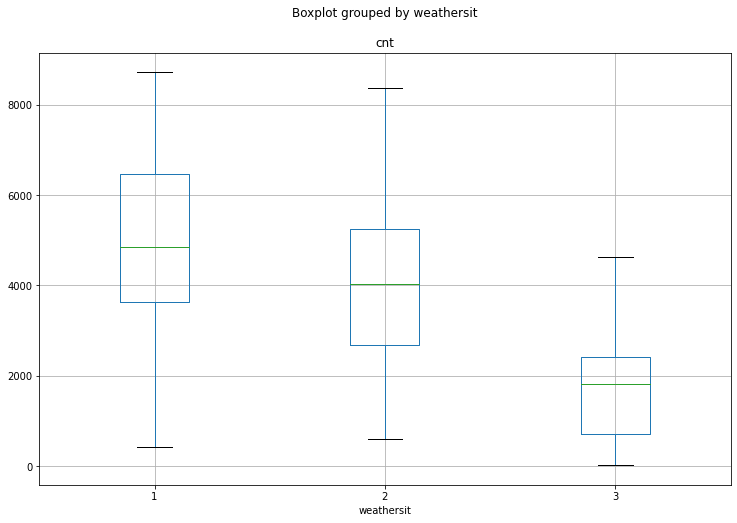

In [10]:
# visualize the data
bike_sharing_data.boxplot(column=['cnt'], by='weathersit', figsize=(12,8))
# appears to be a large variation

In [12]:
#perform one way ANOVA on the three groups
stats.f_oneway(bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 1],
               bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 2],
               bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 3])
# p-value is very small, well below the 5% threshold, this indicates the differences in the means is significant

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

Tukey's Honest Significance Difference test to find out which specific group's means compared with each other are different from other groups

In [13]:
from statsmodels.stats.multicomp import MultiComparison

mul_com = MultiComparison(bike_sharing_data['cnt'], bike_sharing_data['weathersit'])

mul_result = mul_com.tukeyhsd()

print(mul_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------
